# 1. Linear Regression

# 1.2 Solve Optimization in Linear Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt

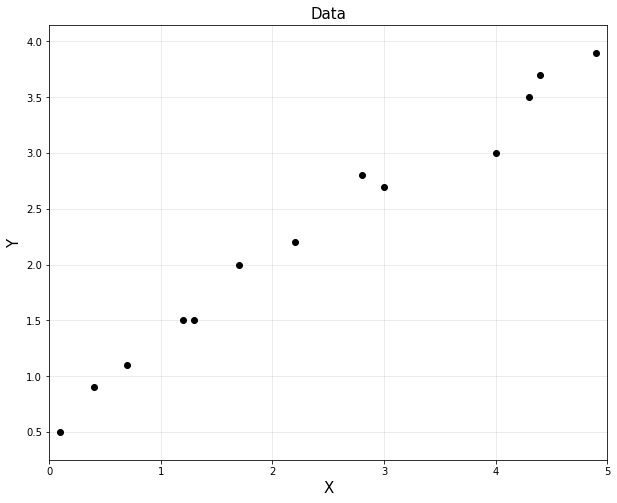

In [3]:
# data points in column vector [input, output]
x = np.array([0.1, 0.4, 0.7, 1.2, 1.3, 1.7, 2.2, 2.8, 3.0, 4.0, 4.3, 4.4, 4.9]).reshape(-1, 1)
y = np.array([0.5, 0.9, 1.1, 1.5, 1.5, 2.0, 2.2, 2.8, 2.7, 3.0, 3.5, 3.7, 3.9]).reshape(-1, 1)

plt.figure(figsize = (10,8))
plt.plot(x, y, 'ko')
plt.title('Data', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.xlim([0, 5])
plt.show()

In [4]:
A = np.hstack([np.ones([x.shape[0], 1]), x])
A

array([[1. , 0.1],
       [1. , 0.4],
       [1. , 0.7],
       [1. , 1.2],
       [1. , 1.3],
       [1. , 1.7],
       [1. , 2.2],
       [1. , 2.8],
       [1. , 3. ],
       [1. , 4. ],
       [1. , 4.3],
       [1. , 4.4],
       [1. , 4.9]])

In [7]:
A.shape, y.shape

numpy.ndarray

In [6]:
A = np.asmatrix(A)
theta = (A.T * A).I * A.T * y
theta

matrix([[0.65306531],
        [0.67129519]])

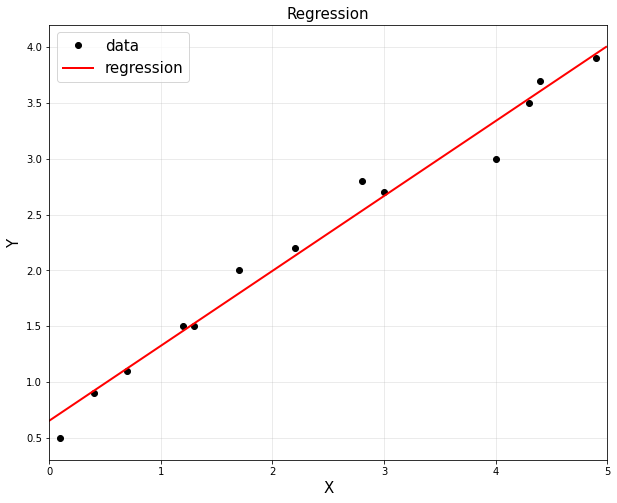

In [18]:
# to plot
plt.figure(figsize = (10, 8))
plt.title('Regression', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.plot(x, y, 'ko', label = "data")

# to plot a straight line (fitted line)
xp = np.arange(0, 5, 0.01).reshape(-1, 1)
yp = theta[0,0] + theta[1,0]*xp

plt.plot(xp, yp, 'r', linewidth = 2, label = "regression")
plt.legend(fontsize = 15)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.xlim([0, 5])
plt.show()

In [19]:
theta = np.zeros((2, 1))
theta = np.random.randn()
alpha = 0.001

for count in range(1000):
    df = 2*(A.T * A * theta - A.T * y)
    theta -= alpha * df
    if count % 100 == 0:
        print(f'#{count} \n {theta}')

#0 
 [[-0.30813974 -0.29458468]
 [-0.17008468 -0.11343958]]
#100 
 [[0.3406117  0.3390374 ]
 [0.76571266 0.76618839]]
#200 
 [[0.5023602  0.50160087]
 [0.71683538 0.71706483]]
#300 
 [[0.58037602 0.58000978]
 [0.6932605  0.69337117]]
#400 
 [[0.61800523 0.61782858]
 [0.68188967 0.68194305]]
#500 
 [[0.63615485 0.63606965]
 [0.67640521 0.67643095]]
#600 
 [[0.64490892 0.64486783]
 [0.6737599  0.67377231]]
#700 
 [[0.64913126 0.64911143]
 [0.67248399 0.67248998]]
#800 
 [[0.6511678  0.65115824]
 [0.67186858 0.67187147]]
#900 
 [[0.65215009 0.65214548]
 [0.67157176 0.67157315]]


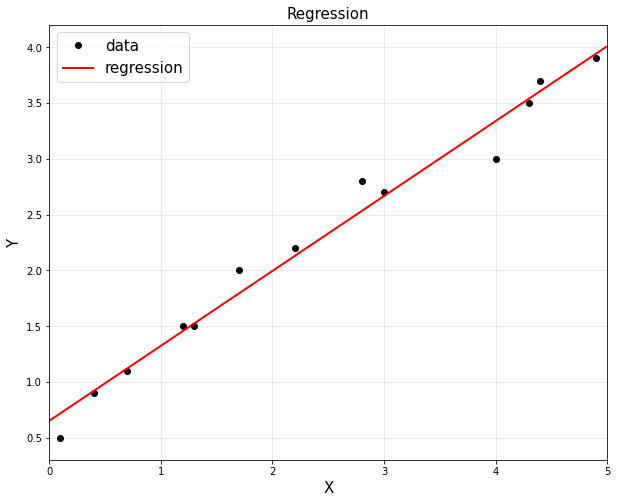

In [20]:
# to plot
plt.figure(figsize = (10, 8))
plt.title('Regression', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.plot(x, y, 'ko', label = "data")

# to plot a straight line (fitted line)
xp = np.arange(0, 5, 0.01).reshape(-1, 1)
yp = theta[0,0] + theta[1,0]*xp

plt.plot(xp, yp, 'r', linewidth = 2, label = "regression")
plt.legend(fontsize = 15)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.xlim([0, 5])
plt.show()

In [14]:
# appendix - hstack, vstack

A = np.array([1, 2, 3, 4]).reshape([2, 2])
B = np.array([5, 6]).reshape([2, 1])
# horizontal stack
C = np.hstack([A, B])
# vertical stack
D = np.vstack([A, B.T])
# ?np.dstack

A, B, C, D

(array([[1, 2],
        [3, 4]]),
 array([[5],
        [6]]),
 array([[1, 2, 5],
        [3, 4, 6]]),
 array([[1, 2],
        [3, 4],
        [5, 6]]))

# 1.3 Scikit-Learn

In [21]:
from sklearn import linear_model

In [22]:
reg = linear_model.LinearRegression()
reg.fit(x, y)

LinearRegression()

In [24]:
reg.coef_, reg.intercept_

(array([[0.67129519]]), array([0.65306531]))

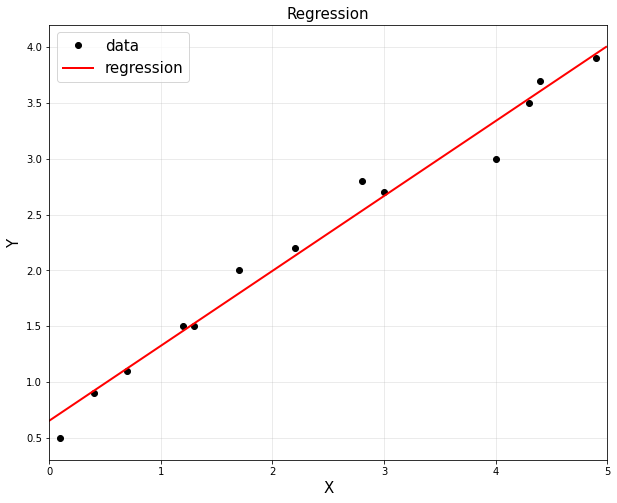

In [25]:
# to plot
plt.figure(figsize = (10, 8))
plt.title('Regression', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.plot(x, y, 'ko', label = "data")

# to plot a straight line (fitted line)
plt.plot(xp, reg.predict(xp), 'r', linewidth = 2, label = "regression")
plt.legend(fontsize = 15)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.xlim([0, 5])
plt.show()

# 2. Multivariate Linear Regression

In [26]:
# for 3D plot
from mpl_toolkits.mplot3d import Axes3D

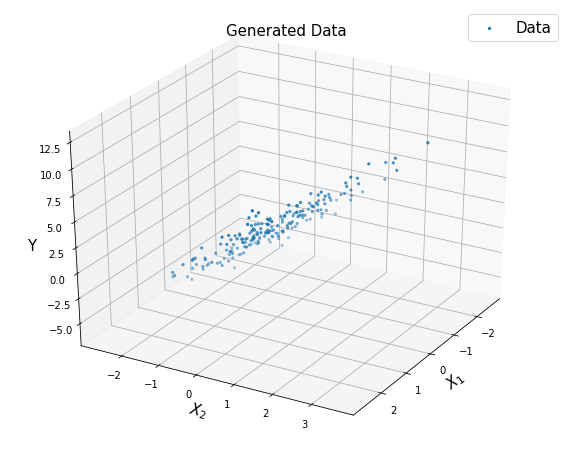

In [29]:
# y = theta0 + theta1*x1 + theta2*x2 + noise

n = 200
x1 = np.random.randn(n, 1)
x2 = np.random.randn(n, 1)
noise = 0.5*np.random.randn(n, 1);

y = 2 + 1*x1 + 3*x2 + noise

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(1, 1, 1, projection = '3d')
ax.set_title('Generated Data', fontsize = 15)
ax.set_xlabel('$X_1$', fontsize = 15)
ax.set_ylabel('$X_2$', fontsize = 15)
ax.set_zlabel('Y', fontsize = 15)
ax.scatter(x1, x2, y, marker = '.', label = 'Data')
ax.view_init(30,30)
plt.legend(fontsize = 15)
plt.show()


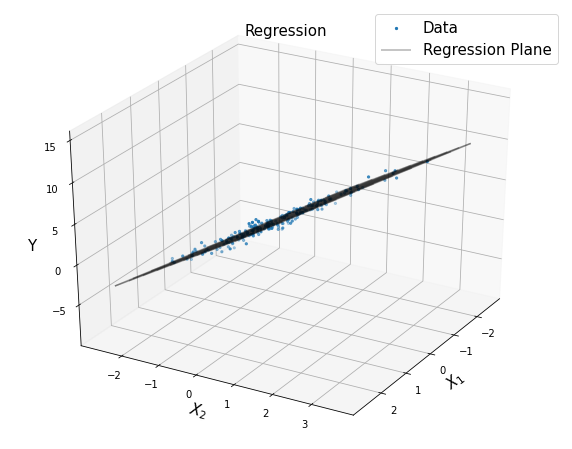

In [33]:
#% matplotlib qt5

A = np.hstack([x1**0, x1, x2])
A = np.asmatrix(A)
theta = (A.T * A).I * A.T * y

X1, X2 = np.meshgrid(np.arange(np.min(x1), np.max(x1), 0.5), 
                     np.arange(np.min(x2), np.max(x2), 0.5))
YP = theta[0,0] + theta[1,0]*X1 + theta[2,0]*X2

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(1, 1, 1, projection = '3d')
ax.set_title('Regression', fontsize = 15)
ax.set_xlabel('$X_1$', fontsize = 15)
ax.set_ylabel('$X_2$', fontsize = 15)
ax.set_zlabel('Y', fontsize = 15)
ax.scatter(x1, x2, y, marker = '.', label = 'Data')
ax.plot_wireframe(X1, X2, YP, color = 'k', alpha = 0.3, label = 'Regression Plane')
ax.view_init(30,30)
plt.legend(fontsize = 15)
plt.show()

# 3. Nonlinear Regression

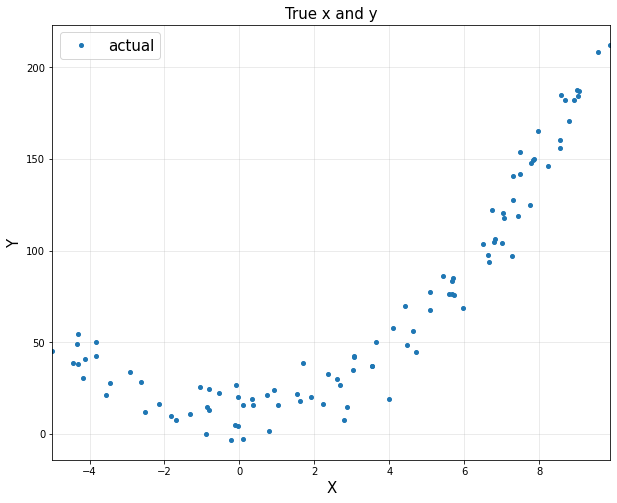

In [34]:
# y = theta0 + theta1*x + theta2*x^2 + noise

n = 100            
x = -5 + 15*np.random.rand(n, 1)
noise = 10*np.random.randn(n, 1)

y = 10 + 1*x + 2*x**2 + noise

plt.figure(figsize = (10, 8))
plt.title('True x and y', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.plot(x, y, 'o', markersize = 4, label = 'actual')
plt.xlim([np.min(x), np.max(x)])
plt.grid(alpha = 0.3)
plt.legend(fontsize = 15)
plt.show()

In [35]:
A = np.hstack([x**0, x, x**2])
A = np.asmatrix(A)

theta = (A.T*A).I * A.T * y
print('theta:\n', theta)

theta:
 [[11.11132827]
 [ 1.06323876]
 [ 2.00373185]]


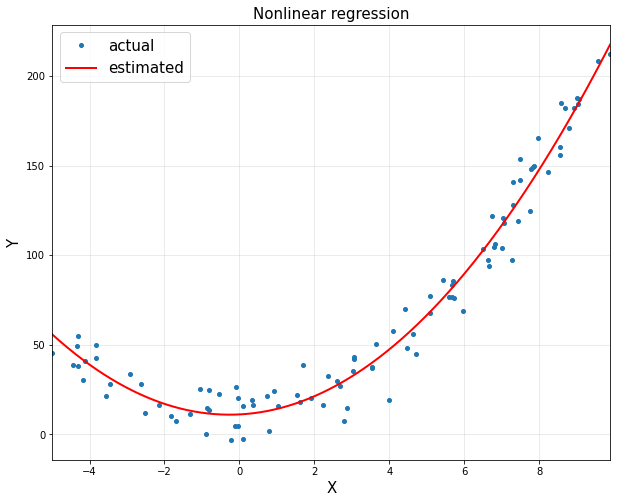

In [36]:
xp = np.arange(np.min(x), np.max(x), 0.01).reshape([-1, 1])
yp = theta[0, 0] + theta[1, 0] * xp + theta[2, 0] * xp ** 2

plt.figure(figsize = (10, 8))
plt.plot(x, y, 'o', markersize = 4, label = 'actual')
plt.plot(xp, yp, 'r', linewidth = 2, label = 'estimated')

plt.title('Nonlinear regression', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.xlim([np.min(x), np.max(x)])
plt.grid(alpha = 0.3)
plt.legend(fontsize = 15)
plt.show()